In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

In [2]:
# retrive data for Apple for last 1 year
df = yf.download("AAPL", period="1y", auto_adjust=True, progress=False)

In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-09-16,215.317917,216.213742,212.929026,215.536884,59357400
2024-09-17,215.785706,215.895197,213.506321,214.750530,45519300
2024-09-18,219.667679,221.678326,216.532262,216.542225,59894900
2024-09-19,227.809769,228.755380,223.589420,223.947753,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900


In [4]:
df.columns = df.columns.droplevel('Ticker')

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-09-16,215.317917,216.213742,212.929026,215.536884,59357400
2024-09-17,215.785706,215.895197,213.506321,214.750530,45519300
2024-09-18,219.667679,221.678326,216.532262,216.542225,59894900
2024-09-19,227.809769,228.755380,223.589420,223.947753,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-09-16,215.317917,216.213742,212.929026,215.536884,59357400
2024-09-17,215.785706,215.895197,213.506321,214.750530,45519300
2024-09-18,219.667679,221.678326,216.532262,216.542225,59894900
2024-09-19,227.809769,228.755380,223.589420,223.947753,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900


In [7]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [8]:
df.columns.name

'Price'

In [9]:
df.columns.name = None

In [10]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-09-16,215.317917,216.213742,212.929026,215.536884,59357400
2024-09-17,215.785706,215.895197,213.506321,214.750530,45519300
2024-09-18,219.667679,221.678326,216.532262,216.542225,59894900
2024-09-19,227.809769,228.755380,223.589420,223.947753,66781300
2024-09-20,227.142868,232.010215,226.565553,228.904673,318679900


In [11]:
price = df[['Close']].astype(float).sort_index()

In [12]:
price.head()

,Close
Date,
2024-09-16,215.317917
2024-09-17,215.785706
2024-09-18,219.667679
2024-09-19,227.809769
2024-09-20,227.142868


In [13]:
returns = price.pct_change().dropna()

In [14]:
returns.head()

,Close
Date,
2024-09-17,0.002173
2024-09-18,0.017990
2024-09-19,0.037065
2024-09-20,-0.002927
2024-09-23,-0.007581


In [15]:
sma20 = price.rolling(20).mean()
sma50 = price.rolling(50).mean()

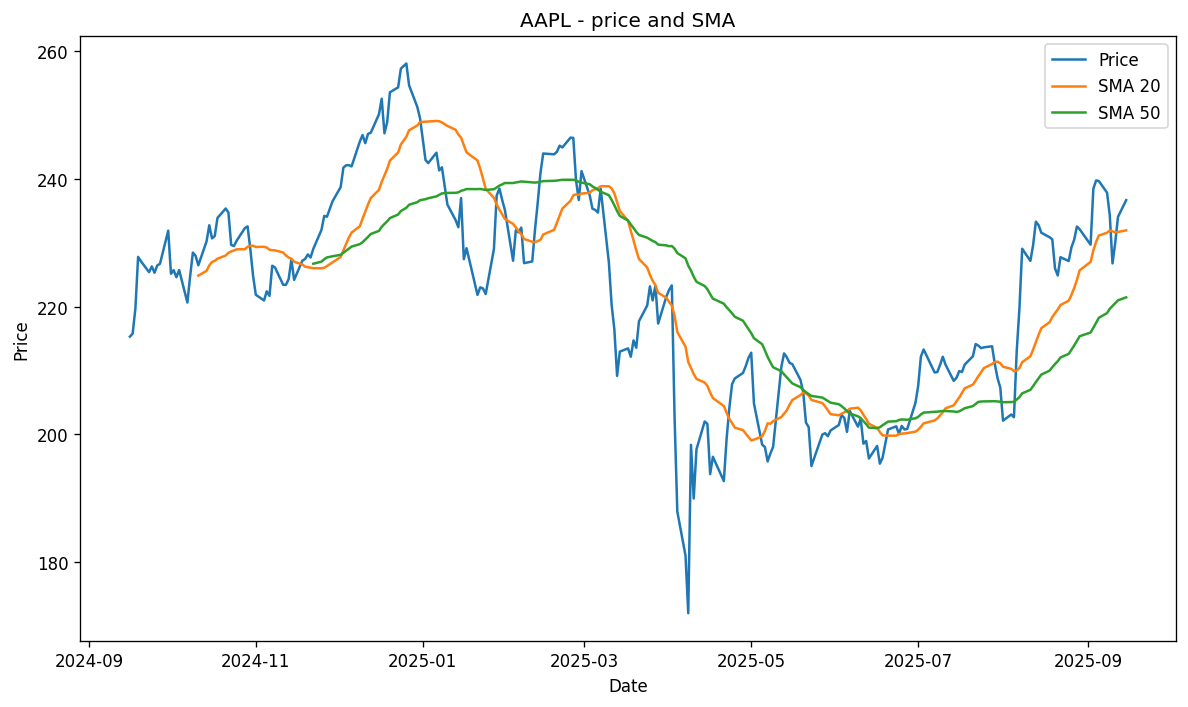

In [16]:
plt.figure()
plt.plot(price.index, price, label='Price')
plt.plot(sma20.index, sma20, label='SMA 20')
plt.plot(sma50.index, sma50, label='SMA 50')
plt.title("AAPL - price and SMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x720 with 0 Axes>

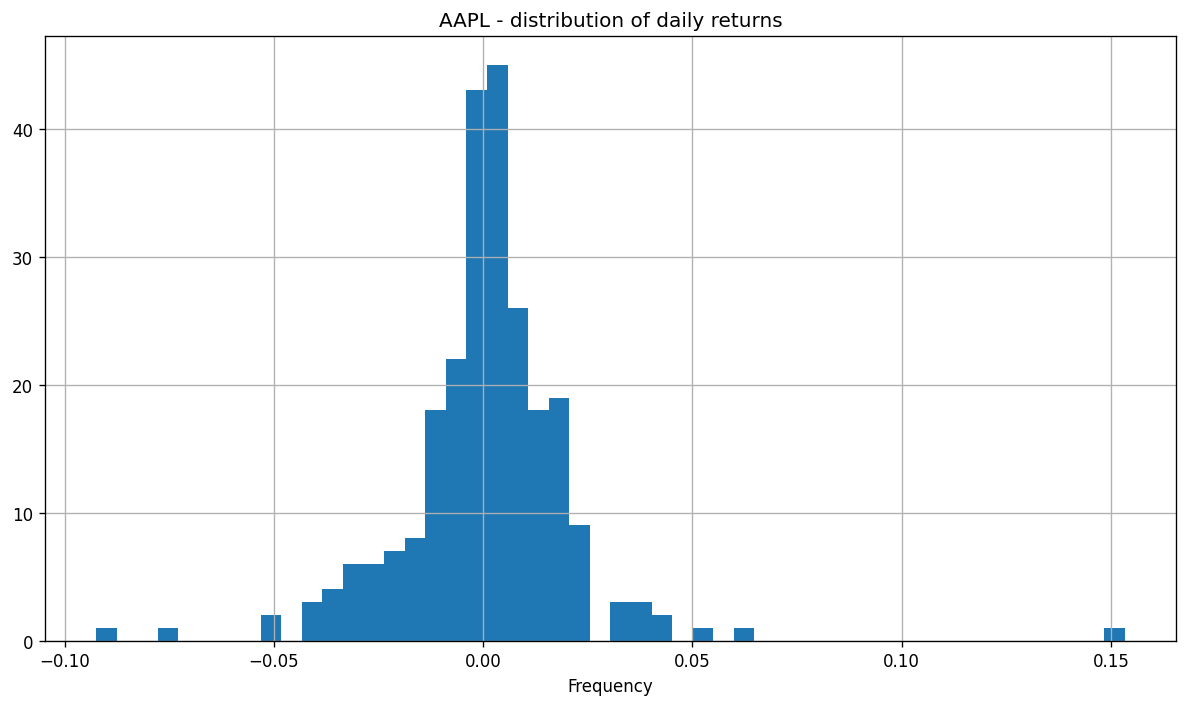

In [17]:
plt.figure()
returns.hist(bins=50)
plt.title('AAPL - distribution of daily returns')
plt.xlabel('Daily return')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

##### Histogram above shows the distribution of AAPL's daily returns over the past year (2024/09 - 2025/09) with most days clustered around small changes near 0%

In [18]:
import numpy as np

In [19]:
mean_return = returns.mean()
volatility = returns.std()
ann_volatility = volatility * np.sqrt(252) # annual volatility (252 trading days)


In [20]:
cum_return = (1 + returns).prod() - 1

In [21]:
print("Average daily return:", mean_return )
print("Daily volatility (std):", volatility )
print("Annualized volatility:", ann_volatility )
print("Cumulative return:", cum_return )

Average daily return: Close    0.000586
dtype: float64
Daily volatility (std): Close    0.020445
dtype: float64
Annualized volatility: Close    0.324556
dtype: float64
Cumulative return: Close    0.099305
dtype: float64
